In [17]:
import pandas as pd
import numpy as np

import string

import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from graphviz import Digraph


In [19]:
def graph(df, eng = 'dot'):
    edge_style = ""
    g = Digraph(engine=eng)
    for k, row in enumerate(df.index):
        if any(df.iloc[k]) or any(df[row]):
            g.node(str(k),row, shape='oval', fontsize='10', width='0') 

    for j, col in enumerate(df.columns):
        for i, row in enumerate(df[col]):
            
            if(row):
                if row == 1:
                    edge_style = "solid"     
                elif row == -1:
                    edge_style="dashed"
                elif row == -2:
                    edge_style = "dotted"

                g.edge(str(i), str(j), label='',style= edge_style)  
    return g 

In [3]:
def generate_conf_df(df, df_ref):
    confMatrix = np.zeros([2,2], dtype=int)
    df_con_graph = df
    
    for col, col_ref in zip(df.columns, df_ref.columns):
        for row, row_ref, index in zip(df[col], df_ref[col_ref], np.arange(0,len(df.columns))):
            if(df[col].index[index] != col):
                if row != row_ref and row == 1:
                    df_con_graph[col][index] = -1 #false positve
                elif row != row_ref and row == 0:
                    df_con_graph[col][index] = -2    #falsa negative
    return df_con_graph

In [4]:
col_labels = ['xmeas%02d_low' % x for x in [1,2,3,8,9,21]]+ ['xmeas%02d_high' % x for x in [1,2,3,8,9,21]] 
df_mat = np.zeros([12,12], dtype=int)

ref_df = pd.DataFrame(df_mat, columns = col_labels, index=col_labels)
ref_df.loc['xmeas01_low'][['xmeas21_high', 'xmeas09_low']] = [1,1]
ref_df.loc['xmeas09_low']['xmeas21_high'] = 1

ref_df.loc['xmeas01_high'][['xmeas21_low', 'xmeas09_high']] = [1,1]
ref_df.loc['xmeas09_high']['xmeas21_low'] = 1

In [5]:
cen_normal = "cenarios/cen_nova_versao/normal/"
cen_media2 = "cenarios/cen_nova_versao/media2/"
cen_media5 = "cenarios/cen_nova_versao/media5/"

cen_normal_rate = cen_normal+"rates/"
cen_media2_rate = cen_media2+"rates/"
cen_media5_rate = cen_media5+"rates/"

graph_normal = "qualificacao/normal/"
graph_mean2 = "qualificacao/mean2/"
graph_mean5 = "qualificacao/mean5/"


In [6]:
def draw_graphs(cen, path_save_graph, df):
    all_settings = ['k%d_l%d_h%d' %(x,y,z) for z in [1,2,3] for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6])]
    for sett in all_settings:
        graph_df = generate_conf_df(pd.read_csv(cen+sett+"_sel_corrs.csv", index_col=0), df)
        graph(graph_df).save(path_save_graph+sett+".dot")
        (graph_,) = pydot.graph_from_dot_file(path_save_graph+sett+".dot")
        graph_.write_png(path_save_graph+'dot_graph'+sett+".png")          
    

In [63]:
def read_graph_imgs(cen_graph_path, path_save_graph):
    img_by_h = []
    imgs  = []

    all_settings = ['k%d_l%d_h%d' %(x,y,z) for z in [2] for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6])]
    count = 0
    for sett in all_settings:
        imgs.append(mpimg.imread(path_save_graph+'dot_graph'+sett+".png"))
        count +=1

        if count > 5:
            count =0
            img_by_h.append(imgs)
            imgs = []
    return img_by_h
    

In [44]:
def disp_grid_graphs(graphs_list):
    plot_loc = 321
    legends = list(string.ascii_lowercase)
    for graphs in graphs_list:
        plt.figure(figsize=(40,50))
        for i, graph in enumerate(graphs):
            plt.subplot(plot_loc+i)
            plt.title(legends[i] +") k, l = "+ str(i+1), fontsize=40)
            plt.imshow(graph, aspect="equal")
            plt.axis('off')
            
        plt.show()

In [20]:
draw_graphs(cen_normal,graph_normal, ref_df)
draw_graphs(cen_media2,graph_mean2, ref_df)
draw_graphs(cen_media5, graph_mean5, ref_df)

In [64]:
normal_graphs = read_graph_imgs(cen_normal, graph_normal)
mean2_graphs = read_graph_imgs(cen_media2, graph_mean2)
mean5_graphs = read_graph_imgs(cen_media5, graph_mean5)

In [253]:
#normal_graphs[0][0]

In [460]:
plt.suptitle?

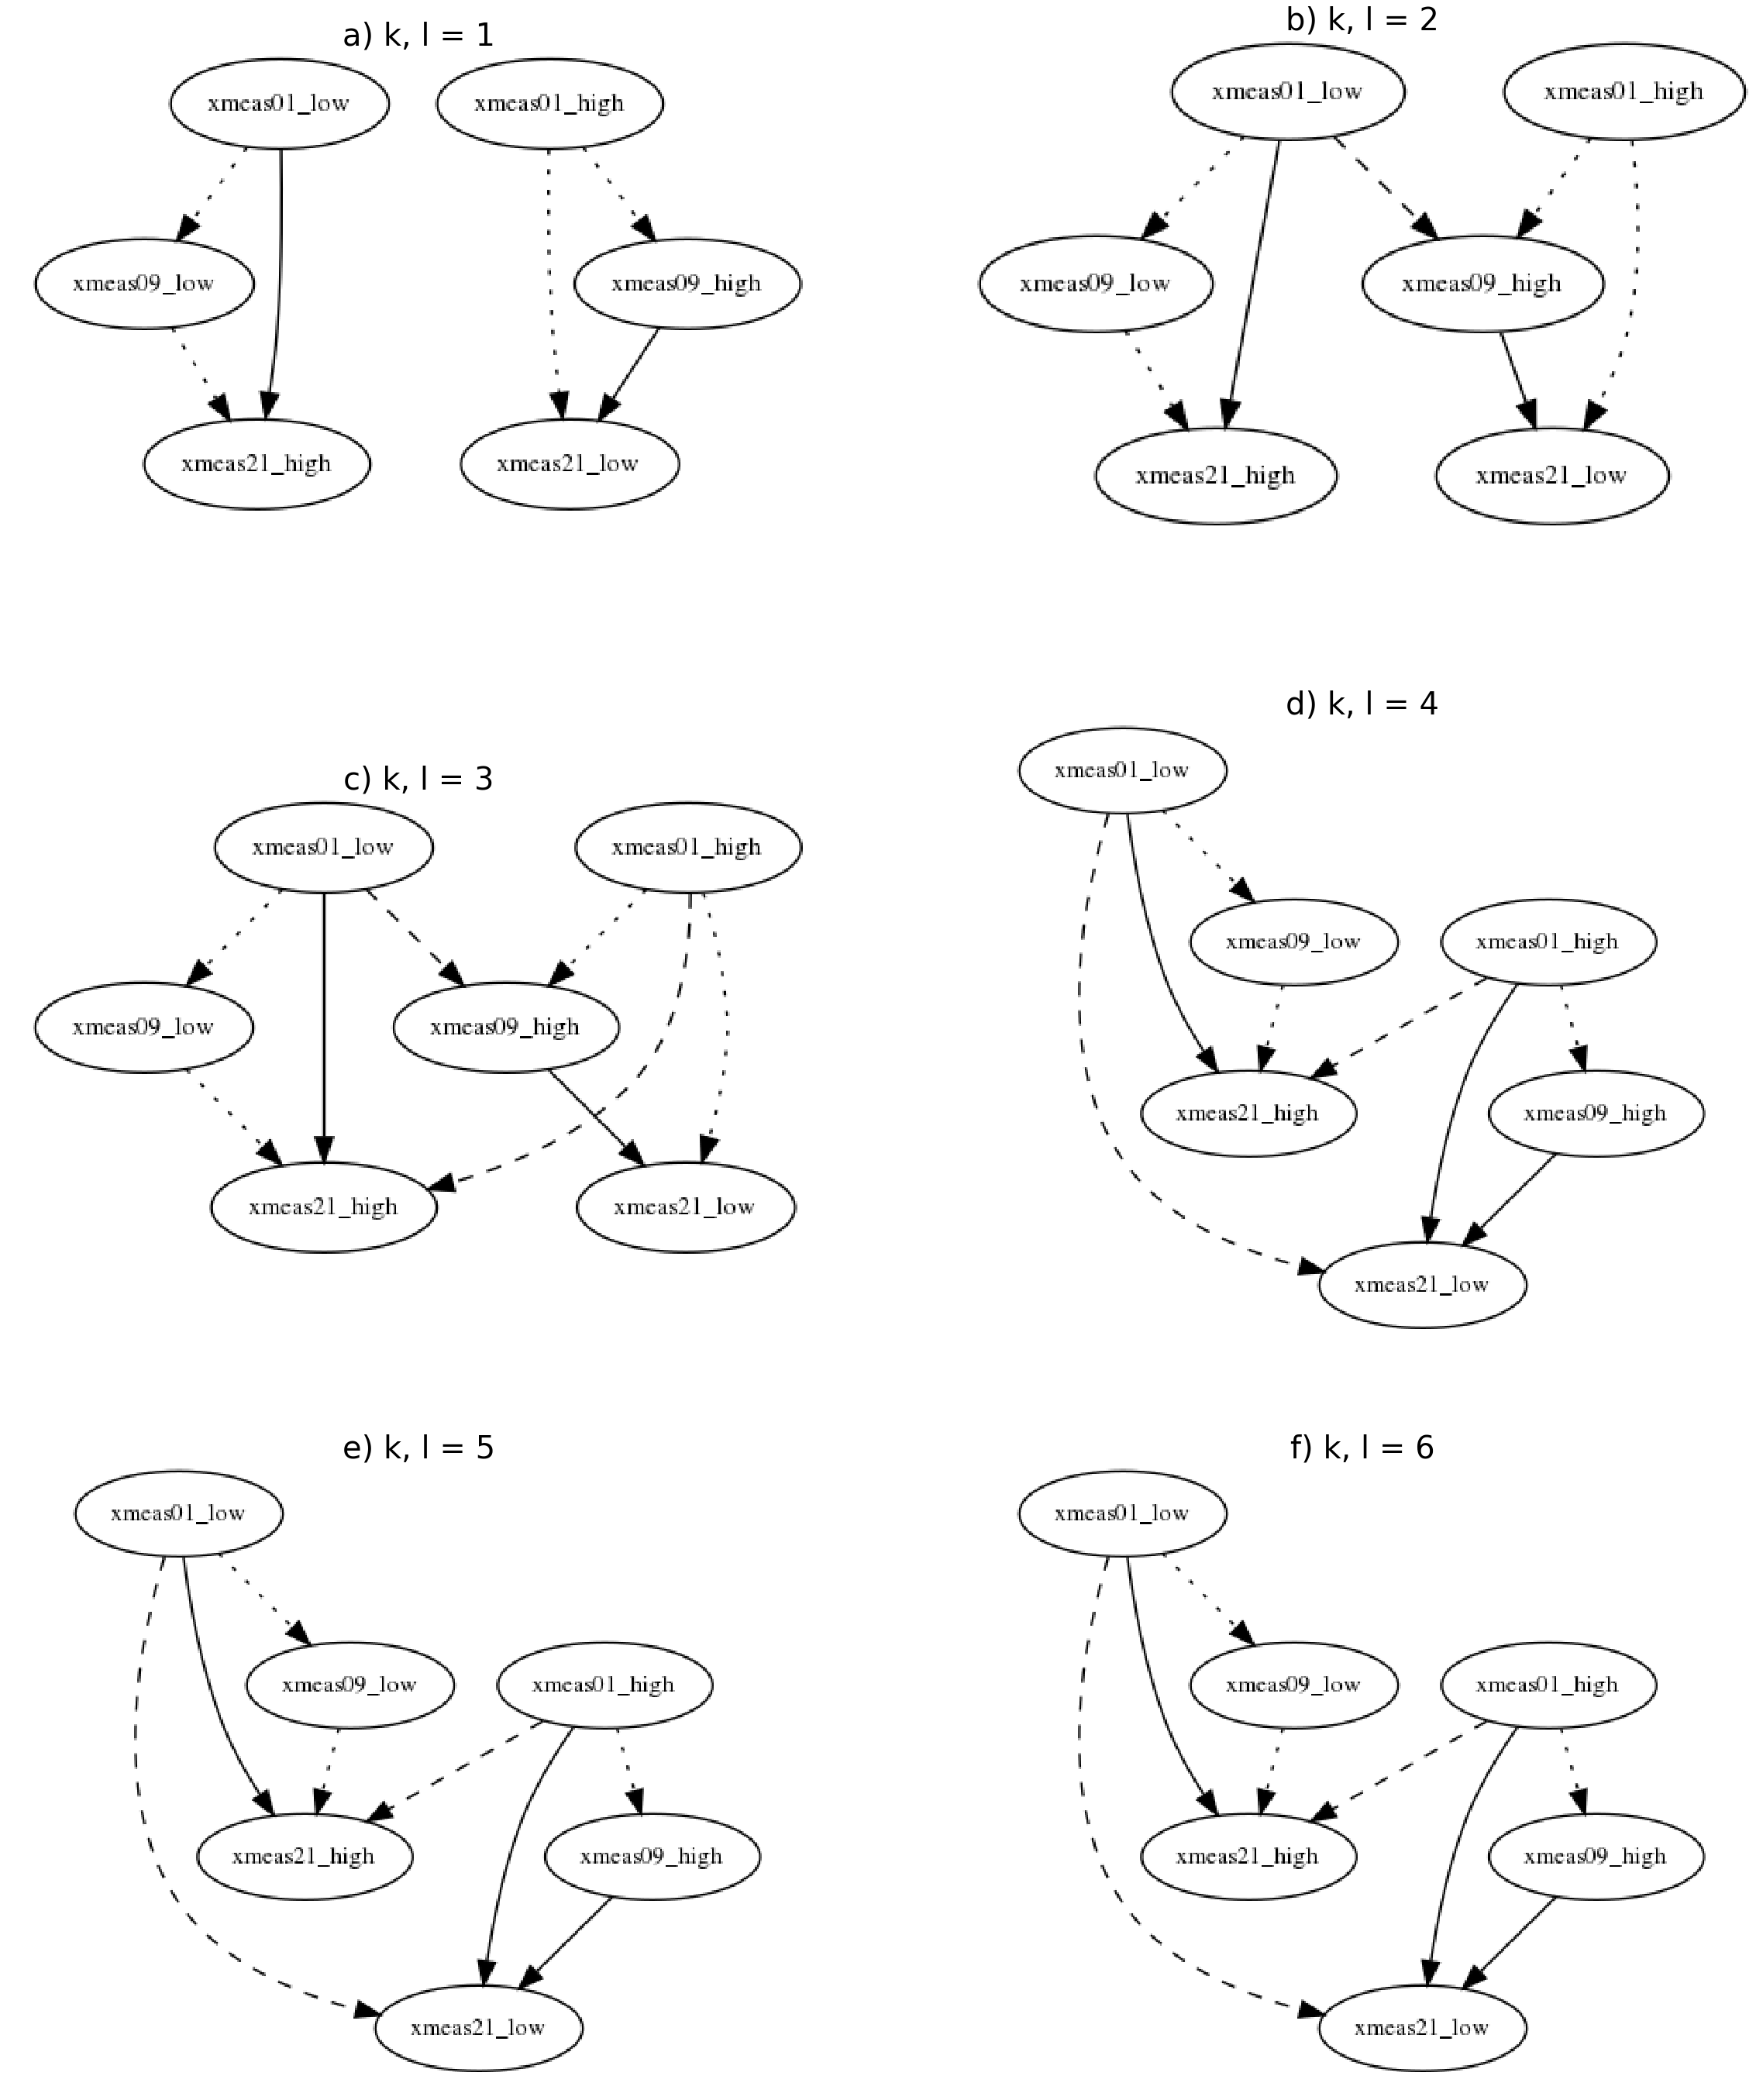

In [65]:
disp_grid_graphs(mean5_graphs)

In [90]:
#criando data frame
d = pd.DataFrame(columns=['Disciplinas'])
d.loc[0] = 'disc'
d.loc[1] = 'disc2'
d.loc[2] = 'disc3'

In [93]:
#supondo que 'd' é o seu dataframe, queremos eliminar as disciplinas 'disc' e 'disc2'
d

,Disciplinas
0,disc
1,disc2
2,disc3


In [100]:
d.drop(d[d.Disciplinas.isin(['disc', 'disc2'])].index, inplace=True)
d

,Disciplinas
2,disc3
